# **Primeros modelos de Machine Learning**

En la clase de hoy comenzaremos a desarrollar nuestros dos primeros modelos de ML. Abordaremos uno para *clasificación* y otro para *regresión*. A lo largo de la cursada, iremos creando más modelos basados en otros algoritmos para ambas subdivisiones del **aprendizaje supervisado**. Después, encararemos el aprendizaje no supervisado.

Veremos una ***regresión lineal*** (para problemas de regresión) en la Práctica_01 y una ***regresión logística*** (aunque su nombre pueda generar confusión al principio, este algoritmo es propio de los problemas de clasificación) en la Práctica_02.

## `Flujo de trabajo en Scikit-Learn`

Para poder implementar nuestros modelos en ML, utilizaremos mayoritariamente la librería Scikit-Learn. Es importante que la descarguen para que puedan ejecutar este notebook. Dejamos [aquí](https://scikit-learn.org/stable/) la documentación. Recomendamos que la vayan viendo para familiarizarse con ella.

Para trabajar con ML, lo que estaremos haciendo habitualmente no es otra cosa que usar clases, objetos y métodos de esos objetos.

<img src=":/_src/assets/SC-L.jpg"
style = "width:800px; height:300px">

En una primera etapa, instanciamos una clase -nuestro modelo de ML-. Luego, entrenamos y predecimos -ambos son métodos de la clase que instanciamos-.

## **Regresión lineal**

Como vimos en la clase, los problemas de regresión son aquellos que tienen como etiqueta de salida una variable numérica.
Una de las formas de poder predecir una etiqueta de estas características es con una regresión lineal. Esta, a su vez, puede ser simple o múltiple, dependiendo de la cantidad de atributos -***X***- que tengamos en nuestro dataset.

Comenzaremos trabajando con una regresión lineal de un solo atributo, partiendo de la conocida ecuación de una recta:

$ Y = mX + b $

m : pendiente

b : ordenada al origen

Ahora bien, para modelar en el mundo real, un mundo predominado por los fenómenos aleatorios y bastante poco determinístico, vamos a incluir lo que se llama un término de error $\epsilon$. Este término le agregará lo que comunmente se conoce como "ruido", el cuál representa información que está presente pero que no es determinante a la hora de encontrar relaciones causales. Reescribimos entonces:

$ Y = mX + b + \epsilon$

donde ahora $\epsilon$ es un término de error aleatorio que se distribuye normal con media cero y varianza 1 ($\epsilon\sim N(0;1)$

## 1. Regresión lineal simple

En este punto, abordaremos una regresión lineal de un solo atributo

In [1]:
# Importamos las librerías necesarias

#import sys
#!{sys.executable} -m pip install numpy pandas matplotlib sklearn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A continuación, generaremos un dataset sintético. Este incluirá 500 datos con una relación lineal que seguirá la forma $y = 3x - 2$. Podrán ver que a esta función le estaremos sumando un poco de *ruido* como habíamos dicho antes.

In [7]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2

y = y_real + np.random.randn(n) # Aquí le agregamos ruido a la función

In [5]:
print(np.random.randn(5))

[ 1.26152815 -1.4035805   1.26838276 -0.18137784  0.02350464]


Procedemos a graficar, ploteando por un lado los valores reales -en verde- y, por otro, la curva teórica -en rojo-.

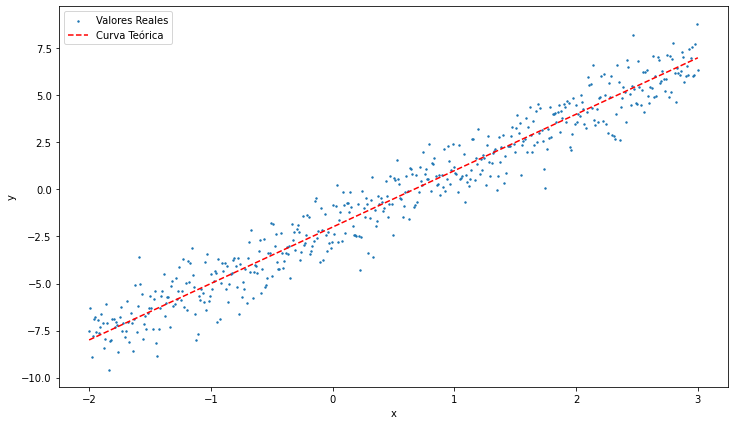

In [8]:
plt.figure(figsize=(12,7))
plt.scatter(X,y, s = 2, label= 'Valores Reales')
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

En la celda de abajo instanciaremos un modelo de regresión lineal. Para ello, debemos entrenar el modelo y hacer un `train_test_split`.

No te preocupes por no haber visto este concepto todavía, ya lo veremos más en detalle en la clase 3. Por el momento, basta con que sepas que este método divide o separa nuestro set de datos en dos subcojuntos -uno de entrenamiento y el otro de testeo-. 

En el primer subset, se le muestra al modelo los datos de entrada de cada uno de los registros y sus respectivas variables de salida. De esta manera, irá aprendiendo de los datos asociando los valores de ***x*** con su variable de salida ***y*** para cada registro. Mientras que, en el subset de testeo, solamente utilizaremos las variables de entrada para que el modelo vaya realizando sus predicciones. A estas predicciones las compararemos con los valores reales -las etiquetas de salida del subset de testeo- para evaluar cuán bien, o no, está infiriendo nuestro modelo.

In [2]:
from sklearn.linear_model import LinearRegression # Importamos el módulo que contiene el algorimto de 
                                                  #regresión lineal

linear_model = LinearRegression() # Instanciamos un objeto de la clase LinearRegression. 
                                  #Aquí estamos creando nuestro modelo predictivo 'linear_model'

from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # Separamos nuestros 
                                                                                           #datos, dejando un 30% 
                                                                                           #para testear


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

De los 500 datos que teníamos en una primera instancia, utilizamos 350 para nuestro subset de entrenamiento y los 150 restantes para testear.

In [12]:
# Entrenamos el modelo

linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predecimos las etiquetas de salida Y en el subset de entrenamiento y en el subset de testeo
#para cada una de las instancias

y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) #subset de testeo

In [15]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y 
#la ordenada al origen que calculó

print('La pendiente es :', linear_model.coef_)
print('La ordenada al origen es:', linear_model.intercept_)

La pendiente es : [3.0757666]
La ordenada al origen es: -2.0069687547977106


Los modelos diseñados para problemas de regresión buscan obtener la curva que mejor aproxime los datos, a través de la minimización de los errores que se determinan entre los valores predichos ($\hat{y}$) y los observados ($y$).

Vamos a ver la curva que calculó este regresor que estamos utilizando.

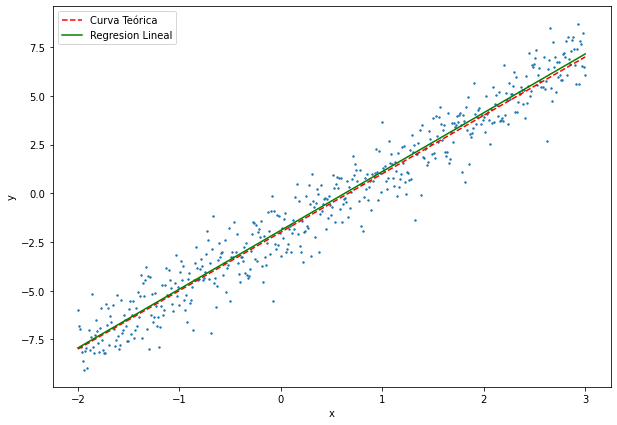

In [9]:
plt.figure(figsize = (10,7))

plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


Podemos observar que nuestro modelo de regresión lineal reproduce con bastante fidelidad la curva teórica de nuestros datos

## **Evaluación del modelo**

En este apartado, avanzaremos en una etapa esencial dentro del flujo de Machine Learning. Esta consiste en la evaluación de los modelos que instanciemos y utilicemos para predecir. En la clase 3 profunidizaremos más sobre este aspecto de evaluación de modelos.

Para esta práctica, enunciaremos brevemente las métricas de evaluación más empleadas en problemas de regresión.

Evaluar un modelo no es otra cosa que cuantificar su performance. Es decir, poder determinar la calidad de sus predicciones.

Partimos del error entre la etiqueta real *Y* y la predicción del modelo *Y'*. En algunos casos, nuestro regresor sobreestimará el valor de la predicción, por lo que el error será positivo -por ejemplo, si el valor de la etiqueta real es 5 y el modelo predijo que era 6, el error será +1-. En otros casos, el regresor subestimará el valor de la predicción, por lo que el error será negativo -si el valor de la etiqueta real es 5 y el modelo predijo que era 4, el error será -1-.

El error de nuestro regresor estará relacionado con la suma de los errores sobre todas las instancias. Habiendo dicho todo lo anterior, queda claro que podría pasar que los errores se compensen y nos engañemos (si sumamos un error en una instancia que es negativo con el error de otra instancia que es positivo, corremos el riesgo de que se anulen).

Para no caer en este escenario, hay diversas soluciones en la aplicabilidad de ciertas métricas de evaluación. Aquí veremos: MAE, MSE y RMSE.

### *MAE (Mean Absolute Error)*

<img src="https://cdn-images-1.medium.com/max/800/1*8DXbECB9pnKxTpIvuVD-vg.png">

Esta métrica suma los valores absolutos de los errores sobre cada isntancia y luego las promedia para obtener el error promedio.

El problema, en este caso, es que el error va a ser mayor cuantas más muestras haya.

### *MSE (Mean Squared Error)*

<img src= "https://pbs.twimg.com/media/Etuc3lBXcAEH7wO.png"
style = "width:375px; height:200px">

Aquí, en lugar de tomar el valor absoluto, tomamos el cuadrado del error.

La desventaja, ahora, es que al estar elevado al cuadrado, el error no tiene la misma magnitud ni unidad que la variable **Y**.

Por ello, se suele aplicar la raíz.

### *RMSE (Root Mean Squared Error)*

<img src= "https://secureservercdn.net/160.153.137.16/70j.58d.myftpupload.com/wp-content/uploads/2019/03/rmse-2.png"
style = "width:375px; height:150px">

Como vemos, esta métrica consiste en aplicarle la raíz cuadrada al MSE.

Tanto MSE y RMSE son más sensibles a los valores atípicos (ya que elevan los errores de cada muestra al cuadrado).

Hay que tener presente que todas estas métricas que vimos miden errores. Con lo cual, a más bajo MAE, MSE o RMSE, mejor regresor. En un caso hipotético de perfección, los errores serán 0.



### *Coeficiente de determinación (R cuadrado)*


<img src= "https://economipedia.com/wp-content/uploads/R-Cuadrado-expresi%C3%B3n-300x192.jpg"
style = "width:300px; height:200px">

Dejamos para al final esta métrica que, al igual que el RMSE, es de las más aplicadas en la materia.

El coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

Su valor, a diferencia de las métricas que estuvimos viendo anteriormente, oscila entre 0 y 1.

Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

Raíz del error cuadrático medio en Train: 0.9684803611083872
Raíz del error cuadrático medio en Test: 1.0766295796692749


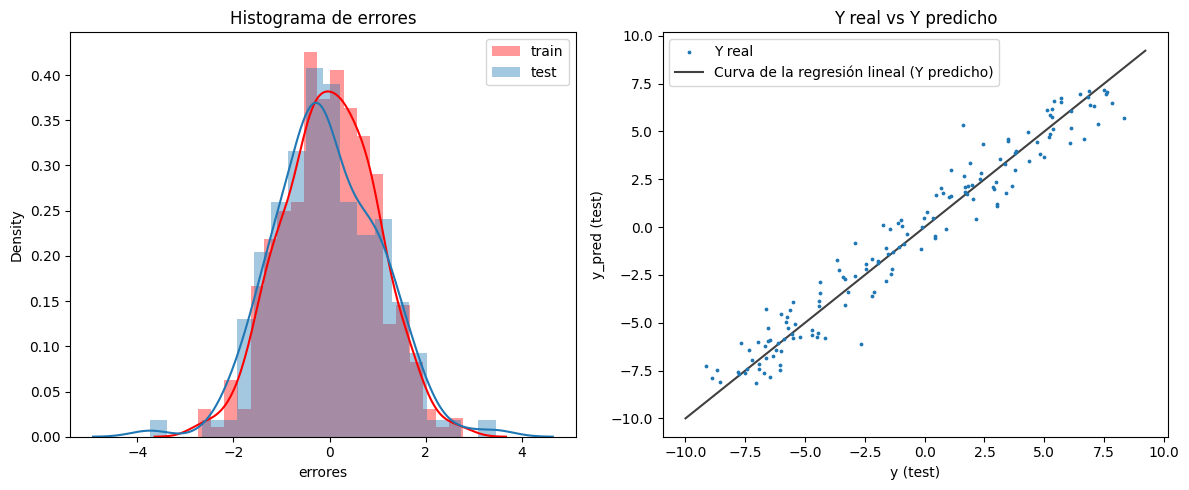

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

*Ya calculamos el RMSE. Ahora calcularemos el coeficiente de determinación de nuestro modelo*

In [51]:
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)


Tenemos un R^2 muy cercano a uno, lo que es un indicio de un modelo que predice con bastante fidelidad

## 2. Regresión lineal múltiple

Ahora trabajaremos una regresión lineal con dos atributos.

$y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido $\epsilon$.

In [18]:
n = 10
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + np.random.randn(n)

In [23]:
x = np.vstack((x1, x2))
x

array([[0.28856234, 0.42217321, 0.93575343, 0.13940042, 0.2428815 ,
        0.14795417, 0.30507912, 0.27556925, 0.22474893, 0.8145072 ],
       [0.40714313, 0.51150343, 0.5870238 , 0.65406504, 0.98686962,
        0.28945421, 0.63214474, 0.2913017 , 0.62197443, 0.48147429]])

In [24]:
x = np.vstack((x1, x2)).T
x

array([[0.28856234, 0.40714313],
       [0.42217321, 0.51150343],
       [0.93575343, 0.5870238 ],
       [0.13940042, 0.65406504],
       [0.2428815 , 0.98686962],
       [0.14795417, 0.28945421],
       [0.30507912, 0.63214474],
       [0.27556925, 0.2913017 ],
       [0.22474893, 0.62197443],
       [0.8145072 , 0.48147429]])

No es necesario entender el código de este gráfico tridimensional. Simplemente es para que puedan visualizar cómo son nuestros datos con dos atributos y una variable de salida.

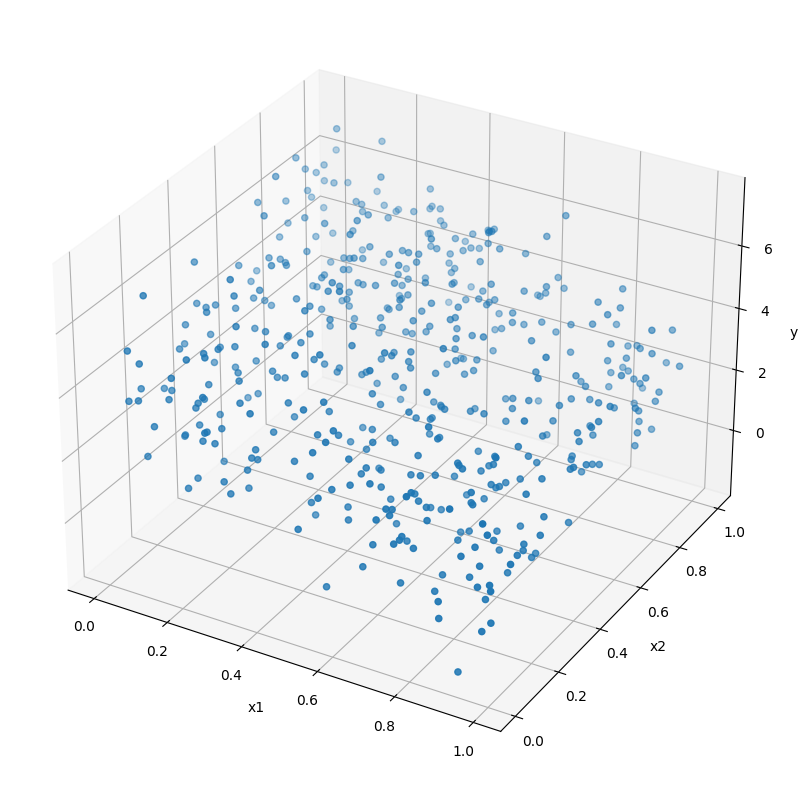

In [22]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (15,10))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [23]:
# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye dos atributos

X = np.vstack((x1,x2)).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


In [25]:
# Instanciamos nuestra regresión lineal y la entrenamos

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [-3.41278428  2.28893103]
La ordenada al origen del modelo de regresión lineal es: 4.057575773086598


En este caso, la curva que aproxima a los datos ya no es una recta sino una superficie. La función definida abajo nos permite graficarla

In [27]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

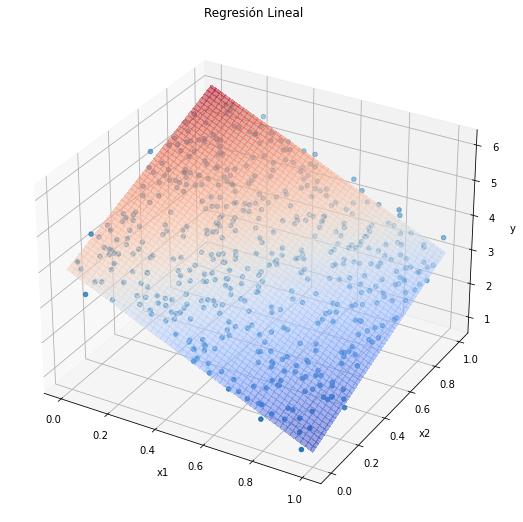

In [18]:
fig = plt.figure(figsize = (30,15))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

Raíz del error cuadrático medio en Train: 0.26074133213703027
Raíz del error cuadrático medio en Test: 0.22229345680342052


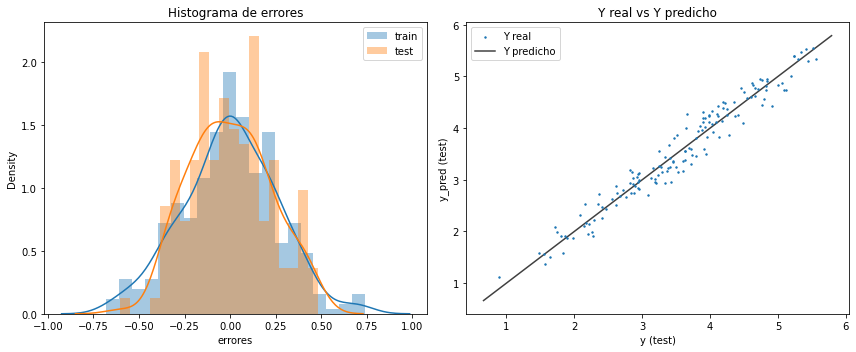

In [19]:
from sklearn.metrics import mean_squared_error

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =2, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predicho')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.legend()
plt.tight_layout()
plt.show()

## 3. Regresión lineal con atributos polinómicos

Aquí tocaremos otro tipo de relación lineal que se puede emplear para problemas de regresión. Ya estamos en presencia de una regresión avanzada que se utiliza para aplicar una regresión lineal a un problema que no es lineal.

Para trabajar con un dataset que tengamos, que no sigue una relación linean, y convertirlo en un problema lineal, debemos hacer un preprocesamiento de los datos.

Lo que se hace en este punto es agregar más atributos.

Por ejemplo, si tenemos :       $Y = ax $<sup>2</sup> + bx + c 

Lo podemos covertir a un problema lineal de la siguiente manera:           $Y = ax $<sub>1</sub> + bx<sub>2</sub> + c   
donde x<sub>1</sub> = x<sup>2</sup> y x<sub>2</sub> = x

De esta forma, se agregó una nueva dimensión. Debemos decidir hasta qué grado agregar. Desde el punto de vista computacional, el dataset obtenido puede ocupar mucho espacio.


In [43]:
# Procedemos a realizar un ejemplo de aplicación. Le agregamos ruido a Y

n = 300
x = np.linspace(-1,1,n)
y_real = -1.5*x**4+3*x**2+1
y = y_real + np.random.randn(n)

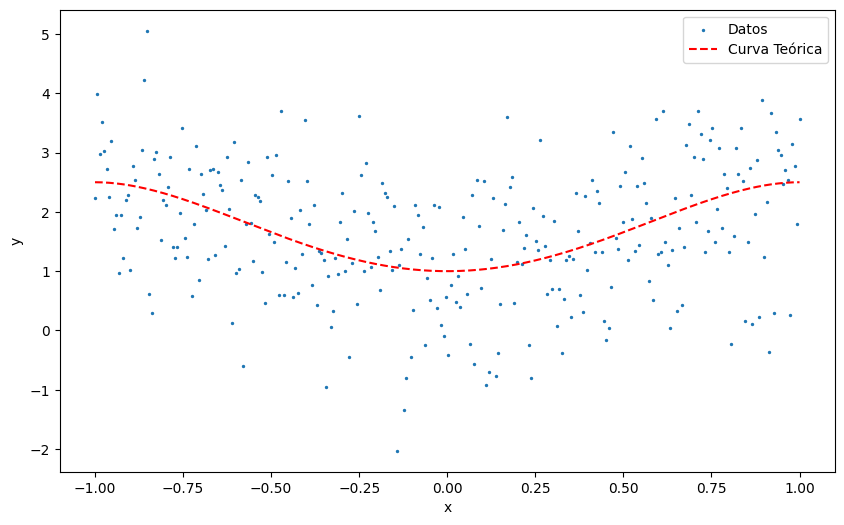

In [44]:
# Graficamos los datos y la curva teórica

plt.figure(figsize= (10,6))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
# Dividimos los datos en subset de entrenamiento y testeo para poder aplicar el flujo de trabajo de Scikit-Learn

from sklearn.model_selection import train_test_split

X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# Primero instanciaremos un modelo básico de relación lineal para poder compararlo, posteriormente, con una regresión lineal con atributos polinómicos

from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [47]:
# Entrenamos el modelo con los datos de entrenamiento

reg_1.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predecimos

y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

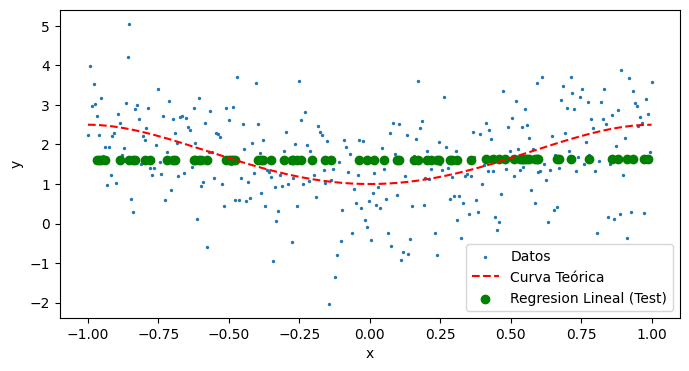

In [49]:
plt.figure(figsize = (8,4))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.scatter(X_test,y_test_pred_1,label ='Regresion Lineal (Test)', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Observamos que utilizar un modelo de regresión lineal para un problema o datos que no responden a esa dinámica, nos da un modelo que no se adapta bien a los datos.

En este momento es donde entra en juego la posibilidad de utilizar una regresión lineal con atributos polinómicos.

Debemos importar de Scikit-Learn la clase `Polynomial Features`.

In [50]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto a partir de la clase `PolynomialFeatures`. Con degree establecemos la cantidad de grados que queremos darle.

In [51]:
poly = PolynomialFeatures(4, include_bias=False)

#Entrenamos y transformamos los atributos para poder obtener un grado 4

X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(225, 4) (75, 4)


In [52]:
# Instanciamos un nuevo modelo de regresión lineal, pero ahora tendrá los atributos polinómicos que definimos en la celda anterior
reg_2 = LinearRegression()

# Entrenamos la regresión con los atributos X polinómicos
reg_2.fit(X_train_new, y_train)

# Predecimos
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

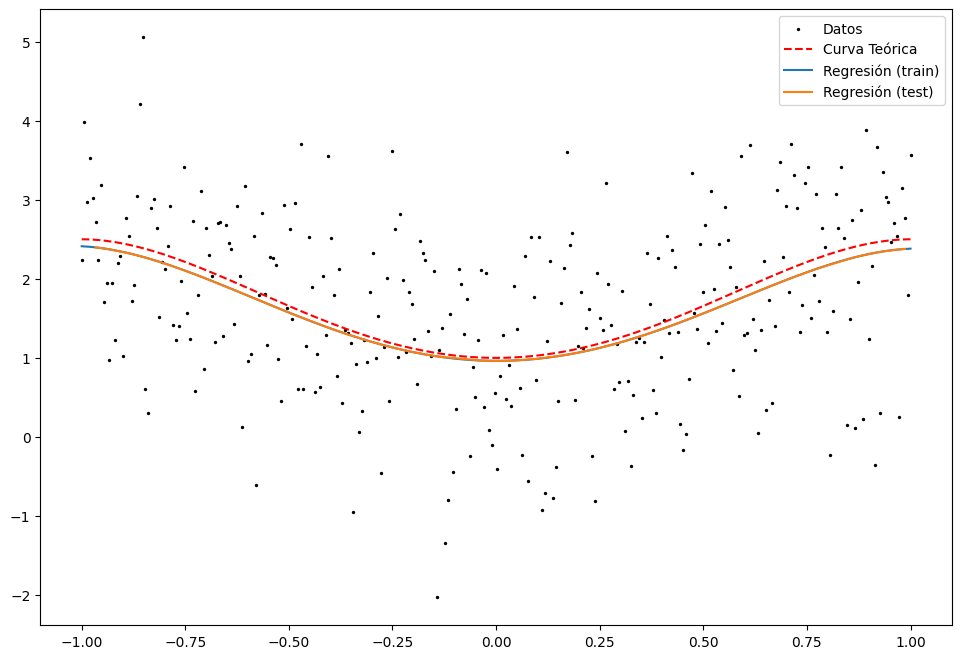

In [53]:
plt.figure(figsize = (40,8))
plt.subplot(1,3,1)
plt.scatter(x,y, s = 2, label = 'Datos', color = 'black')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')

list1, list2 = zip(*sorted(zip(X_train_new[:,0], y_train_pred_2)))
plt.plot(list1, list2,label ='Regresión (train)')

list1, list2 = zip(*sorted(zip(X_test_new[:,0], y_test_pred_2)))
plt.plot(list1, list2,label = 'Regresión (test)')
plt.legend()
plt.show()

*Ahora, al agregarle atributos polinómicos a nuestra regresión lineal, tenemos un modelo que se adapta mucho mejor a nuestros datos.*

## Práctica Adicional

La tarea de hoy es bastante simple. Al haber visto bastante contenido en clase sus cabezas neesitan descansar un poco, procesar y **REPASAR**. **NP**, repito, **NO** vamos a revisar la tarea en el code review, ya que es más una manera de ustedes seguir con el contenido de la clase más que una tarea nueva. Las preguntas pertinentes deben referise al canal de Slack del grupo. Se les recomienda igualmente trabajar con sus compañeros para resolver las dudas, ya que dentro de poco entraran a la parte de Labs.

La tarea implica cargar el archivo `data_regression.csv` y fittear un modelo lineal simple usando cada variable $X$ primero, y después un modelo linear múltiple usando $X1$, $X2$ y $X3$ al mismo tiempo.

1- ¿Qué diferencias existe entre la relación de cada variable de input con el output ($y$)? 
2- ¿Cómo es la correlación entre las variables regresoras y el output?
3- ¿Qué pueden notar cuando realizan la regresión múltiple?¿Los resultados difieren de lo anterior?
4- Calcule las medidas MSE y Coeficiente R2 para evaluar cada modelo.

In [3]:
import pandas as pd
filename = 'data_regression.csv'
data = pd.read_csv(filename, header=0)

print(data.head())

   Unnamed: 0         X1        X2        X3          y
0           0 -10.000000  0.000000 -5.000000  10.958481
1           1  -9.986658  0.014676 -4.996664   8.991666
2           2  -9.973316  0.029353 -4.993329  10.398068
3           3  -9.959973  0.044029 -4.989993  11.759961
4           4  -9.946631  0.058706 -4.986658  10.177304


In [97]:
print(X1.min(), X1.max())
print(X2.min(), X2.max())
print(X3.min(), X3.max())

-10.0 10.0
0.0 22.0
-5.0 0.0


In [4]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
X3 = data['X3'].to_numpy()
y = data['y'].to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


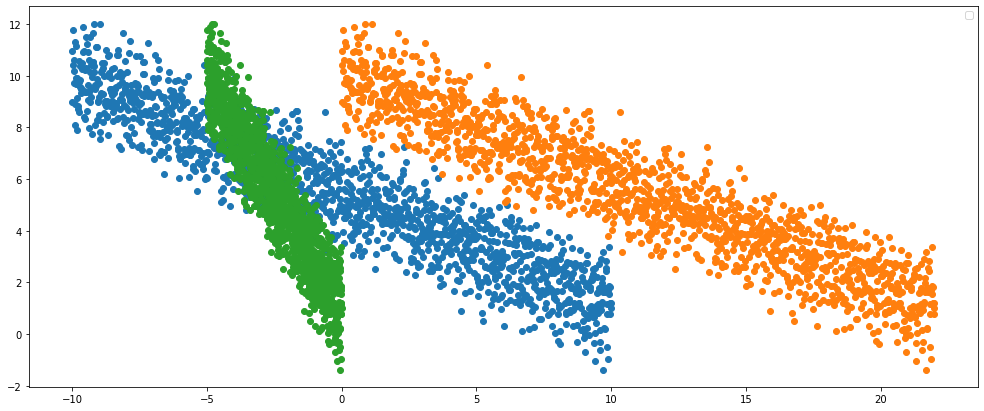

In [88]:
plt.figure(figsize= (17,7))
plt.scatter(X1,y)
plt.scatter(X2, y)
plt.scatter(X3, y)
plt.legend()


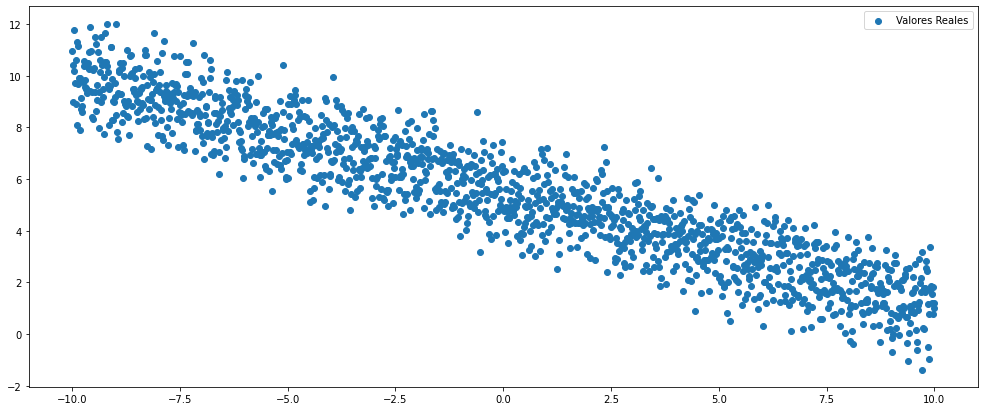

In [6]:
x = X1



plt.figure(figsize=(17,7))
plt.scatter(x,y, label= 'Valores Reales')


plt.legend()
plt.show()

In [13]:
regresion = LinearRegression()

x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1050, 1) (450, 1) (1050,) (450,)


In [14]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_trainPred = linear_model.predict(x_train)
y_testPred = linear_model.predict(x_test)



In [16]:
print('La pendiente es :', linear_model.coef_)
print('La ordenada al origen es:', linear_model.intercept_)

La pendiente es : [-0.44618404]
La ordenada al origen es: 5.489769168575827


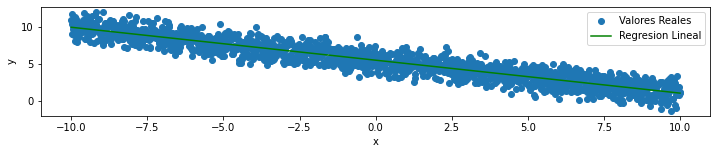

In [89]:
plt.figure(figsize=(12,2))
plt.scatter(x,y, label= 'Valores Reales')
plt.plot(x,linear_model.predict(x), label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()



In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns

In [23]:
rmse_train = (mean_squared_error(y_train, y_trainPred, squared = False))
rmse_test = (mean_squared_error(y_test, y_testPred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


Raíz del error cuadrático medio en Train: 1.0095738708684368
Raíz del error cuadrático medio en Test: 0.9783822079959493


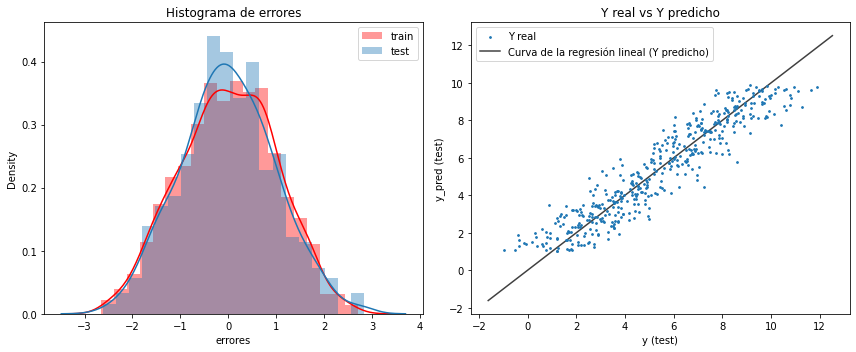

In [24]:
plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_trainPred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_testPred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_testPred, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
r2 = r2_score(y_test, y_testPred) 
print('El coeficiente de determinación del regresor es:', r2)


El coeficiente de determinación del regresor es: 0.8748049364266249


2

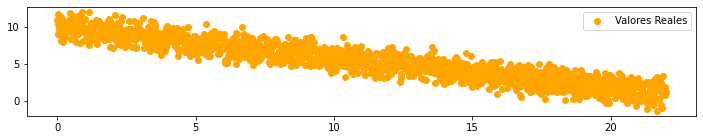

In [91]:
x2 = X2 
y2 = y

plt.figure(figsize=(12,2))
plt.scatter(x2,y2, color= 'orange', label= 'Valores Reales')


plt.legend()
plt.show()

In [46]:

x2=x2.reshape(-1, 1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size= 0.30, random_state=42)

print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1050, 1) (450, 1) (1050,) (450,)


In [47]:
y2_trainPred = linear_model.predict(x2_train)
y2_testPred = linear_model.predict(x2_test)





In [48]:
print('La pendiente es :', linear_model.coef_)
print('La ordenada al origen es:', linear_model.intercept_)

La pendiente es : [-0.44618404]
La ordenada al origen es: 5.489769168575827


ValueError: Expected 2D array, got 1D array instead:
array=[0.00000000e+00 1.46764510e-02 2.93529019e-02 ... 2.19706471e+01
 2.19853235e+01 2.20000000e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

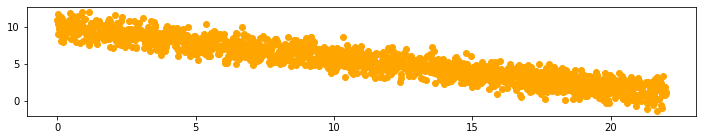

In [92]:

plt.figure(figsize=(12,2))
plt.scatter(x2,y2, color= 'orange', label= 'Valores Reales')
plt.plot(x2,linear_model.predict(x2), label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y2')
plt.legend()

plt.show()

In [50]:
rmse_train2 = (mean_squared_error(y2_train, y2_trainPred, squared = False))
rmse_test2 = (mean_squared_error(y2_test, y2_testPred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test2}')

Raíz del error cuadrático medio en Train: 5.012386725978705
Raíz del error cuadrático medio en Test: 5.016151117565331


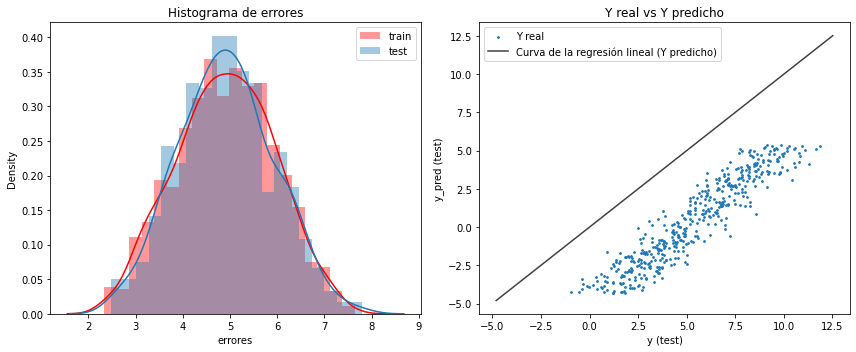

In [55]:
plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y2_train - y2_trainPred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y2_test - y2_testPred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y2_test,y2_testPred, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
r3 = r2_score(y2_test, y2_testPred) 
print('El coeficiente de determinación del regresor es:', r3)


El coeficiente de determinación del regresor es: -2.2908746143811203



3

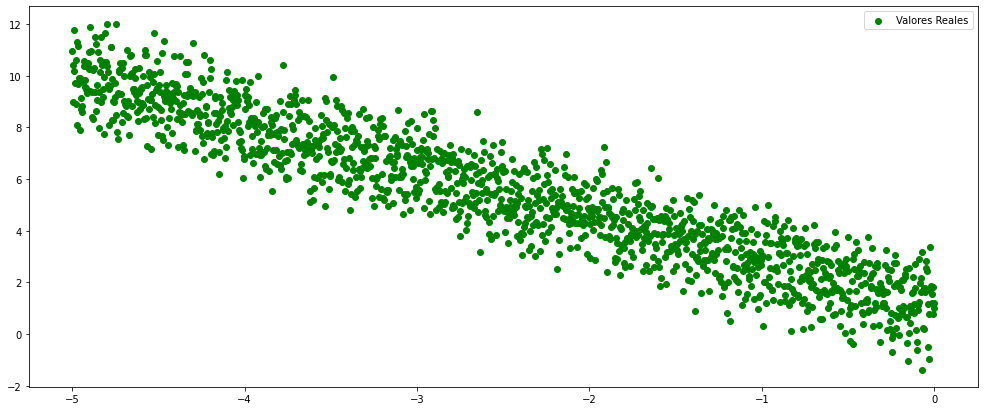

In [63]:
x3 = X3 
y3 = y 

plt.figure(figsize=(17, 7))
plt.scatter(x3, y3, color= 'green', label= 'Valores Reales') 
plt.legend()

In [64]:
x3=x3.reshape(-1, 1)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size= 0.30, random_state=42)

print(x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(1050, 1) (450, 1) (1050,) (450,)


In [103]:
y3_trainPred = linear_model.predict(x3_train)
y3_testPred = linear_model.predict(x3_test)

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

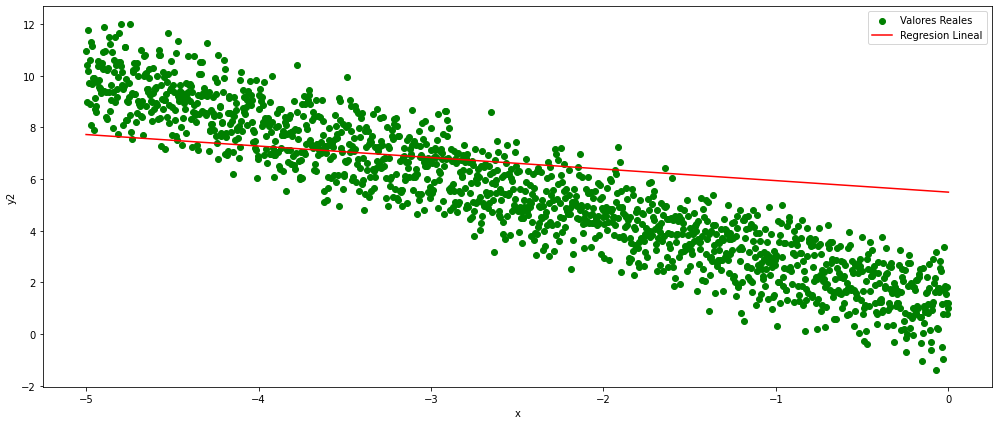

In [70]:
plt.figure(figsize=(17,7))
plt.scatter(x3,y3, color= 'green', label= 'Valores Reales')
plt.plot(x3,linear_model.predict(x3), label ='Regresion Lineal', c = 'r')
plt.xlabel('x')
plt.ylabel('y2')
plt.legend()

plt.show()

In [71]:
rmse_train3 = (mean_squared_error(y3_train, y3_trainPred, squared = False))
rmse_test3 = (mean_squared_error(y3_test, y3_testPred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train3}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test3}')

Raíz del error cuadrático medio en Train: 2.437275390076839
Raíz del error cuadrático medio en Test: 2.493567632013513


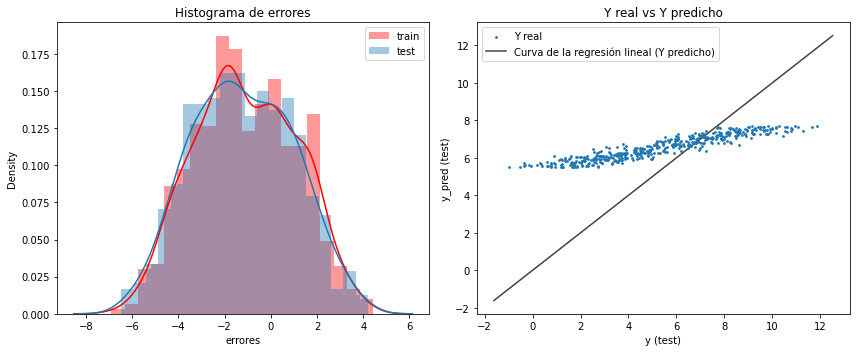

In [72]:
plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y3_train - y3_trainPred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y3_test - y3_testPred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y3_test,y3_testPred, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
r4 = r2_score(y3_test, y3_testPred) 
print('El coeficiente de determinación del regresor es:', r4)

El coeficiente de determinación del regresor es: 0.18677182630233846


4

In [ ]:
print()

In [76]:
xT = np.vstack((X1, X2, X3)).T 

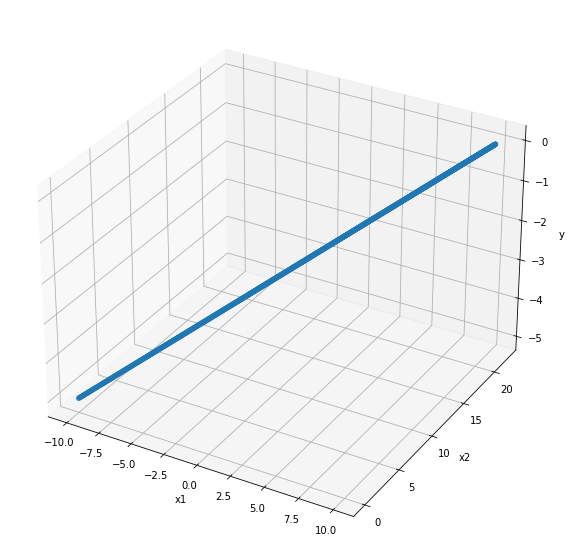

In [83]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_scatter(X1, X2, X3, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (15,10))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X1, X2, X3, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    #ax.set_label('x3')
    ax.set_zlabel('y')

plot_3d_scatter(X1, X2, X3, y, ax=None, fig = None)

In [93]:
xT_train, xT_test, y_train, y_test = train_test_split(xT, y, test_size=0.30, random_state=42)

print(xT_train.shape, y_train.shape, xT_test.shape, y_test.shape)

(1050, 3) (1050,) (450, 3) (450,)


In [94]:
linear_model.fit(xT_train, y_train)

LinearRegression()

In [95]:
print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [-4.80889429e+12  4.92235775e+12 -2.42279692e+12]
La ordenada al origen del modelo de regresión lineal es: -60202927499590.266


In [100]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, x3_min, x3_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    x3 = np.linspace(x3_min, x3_max, N)
    X1, X2, X3 = np.meshgrid(x1,x2,x3)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel(), X3.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, X3, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

TypeError: 'Axes3DSubplot' object cannot be interpreted as an integer

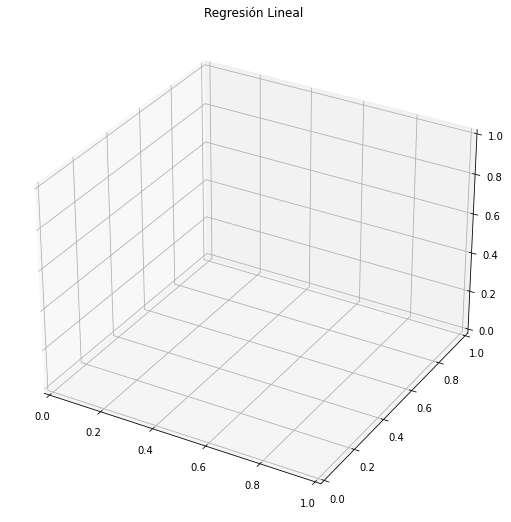

In [102]:
fig = plt.figure(figsize = (30,15))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(-10, 10, 0, 22, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, x3, y, ax, fig)

In [ ]:
-10.0 10.0
0.0 22.0
-5.0 0.0